## Homework 3

* Generate dataset using `make_classification` function in the sklearn.datasets class. Generate 10000 samples with 8 features (X) with one label (y). Also, use following parameters    
    * `n_informative` = 5
    *  `class_sep` = 2
    * `random_state` = 42
* Explore and analyse raw data.
* Do preprocessing for classification.
* Split your dataset into train and test test (0.7 for train and 0.3 for test).
* Try Decision Tree and XGBoost Algorithm with different hyperparameters. (Using GridSearchCV is a plus)
* Evaluate your result on both train and test set. Analyse if there is any underfitting or overfitting problem. Make your comments.

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [2]:
# Generate dataset using make_classification function in the sklearn. 
# Convert it into pandas dataframe.
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=100, n_features=5, random_state = 42)

In [3]:
X

array([[-0.43066755,  0.67287309, -0.72427983, -0.53963044, -0.65160035],
       [ 0.21164583, -0.84389686,  0.53479393,  0.82584805,  0.68195297],
       [ 1.09267506,  0.40910605,  1.10009583, -0.94275087, -0.98150865],
       [ 1.51990078, -0.77336118,  1.99805321,  0.15513175, -0.3853136 ],
       [-0.45390127, -2.18347304,  0.24472415,  2.59123946, -0.48423407],
       [-1.46361184,  0.37531604, -1.79532002,  0.25415746, -1.24778318],
       [ 0.88948365,  0.80742726,  0.73019848, -1.28568005,  0.13074058],
       [-1.11327862,  1.89033108, -1.92487377, -1.5598485 ,  0.18645431],
       [ 0.63174629, -0.88541844,  1.02703224,  0.68057323,  0.54709738],
       [-0.88602706, -0.83311649, -0.7173148 ,  1.31217492,  0.44381943],
       [ 0.56372286, -1.47487037,  1.15509316,  1.35536951, -0.2176812 ],
       [-1.02754411, -0.32929388, -1.05383855,  0.82600732, -0.05952536],
       [ 0.19375402, -0.96314239,  0.55600276,  0.96423311, -0.20219265],
       [-0.05396947,  0.15985512, -0.1

In [4]:
y

array([0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1])

In [5]:
df1 = pd.DataFrame(X, columns = ['A','B','C', 'D', 'E'])
df1

,A,B,C,D,E
0,-0.430668,0.672873,-0.724280,-0.539630,-0.651600
1,0.211646,-0.843897,0.534794,0.825848,0.681953
2,1.092675,0.409106,1.100096,-0.942751,-0.981509
3,1.519901,-0.773361,1.998053,0.155132,-0.385314
4,-0.453901,-2.183473,0.244724,2.591239,-0.484234
5,-1.463612,0.375316,-1.795320,0.254157,-1.247783
6,0.889484,0.807427,0.730198,-1.285680,0.130741
7,-1.113279,1.890331,-1.924874,-1.559849,0.186454
8,0.631746,-0.885418,1.027032,0.680573,0.547097
9,-0.886027,-0.833116,-0.717315,1.312175,0.443819


In [6]:
df2 = pd.DataFrame(y,  columns = ['Label'])
df2

,Label
0,0
1,1
2,0
3,0
4,1
5,1
6,0
7,0
8,1
9,1


In [12]:
df=pd.concat([df1, df2], axis=1)

In [13]:
df

,A,B,C,D,E,Label
0,-0.430668,0.672873,-0.724280,-0.539630,-0.651600,0
1,0.211646,-0.843897,0.534794,0.825848,0.681953,1
2,1.092675,0.409106,1.100096,-0.942751,-0.981509,0
3,1.519901,-0.773361,1.998053,0.155132,-0.385314,0
4,-0.453901,-2.183473,0.244724,2.591239,-0.484234,1
5,-1.463612,0.375316,-1.795320,0.254157,-1.247783,1
6,0.889484,0.807427,0.730198,-1.285680,0.130741,0
7,-1.113279,1.890331,-1.924874,-1.559849,0.186454,0
8,0.631746,-0.885418,1.027032,0.680573,0.547097,1
9,-0.886027,-0.833116,-0.717315,1.312175,0.443819,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
A        100 non-null float64
B        100 non-null float64
C        100 non-null float64
D        100 non-null float64
E        100 non-null float64
Label    100 non-null int64
dtypes: float64(5), int64(1)
memory usage: 4.8 KB


In [15]:
# Check duplicate values and missing data.
# Check missing data
df.isna().sum()

A        0
B        0
C        0
D        0
E        0
Label    0
dtype: int64

In [16]:
#Check duplicate values 
df.duplicated().sum()

0

In [ ]:
# Visualize data for each feature (pairplot,distplot).

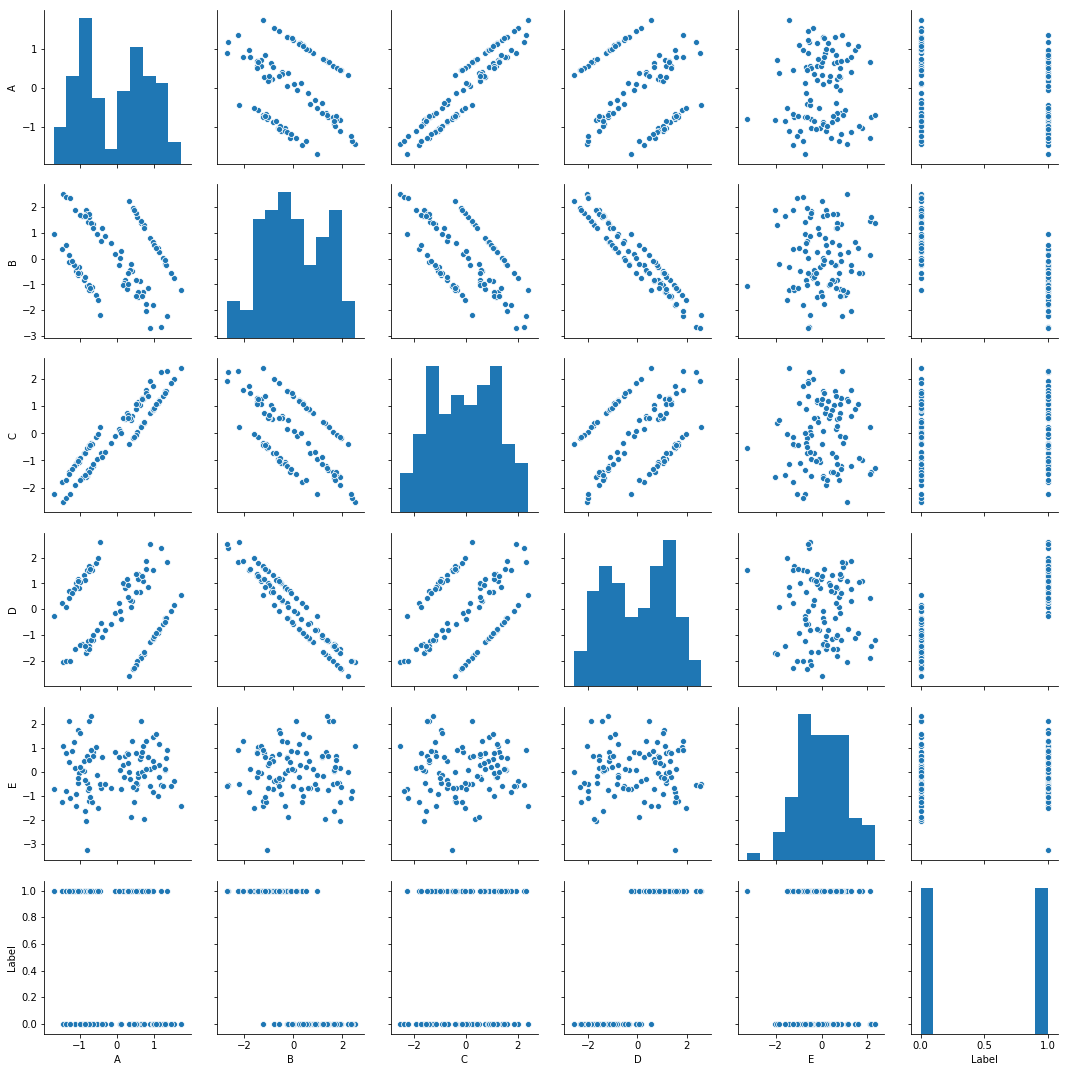

In [17]:
import seaborn as sns
sns.pairplot(df)

In [18]:
# Draw correlation matrix.
df.corr()

,A,B,C,D,E,Label
A,1.000000,-0.309667,0.939231,0.018863,0.038405,-0.202191
B,-0.309667,1.000000,-0.617260,-0.956517,0.011416,-0.763444
C,0.939231,-0.617260,1.000000,0.360942,0.027656,0.108329
D,0.018863,-0.956517,0.360942,1.000000,-0.023785,0.864791
E,0.038405,0.011416,0.027656,-0.023785,1.000000,0.068353
Label,-0.202191,-0.763444,0.108329,0.864791,0.068353,1.000000


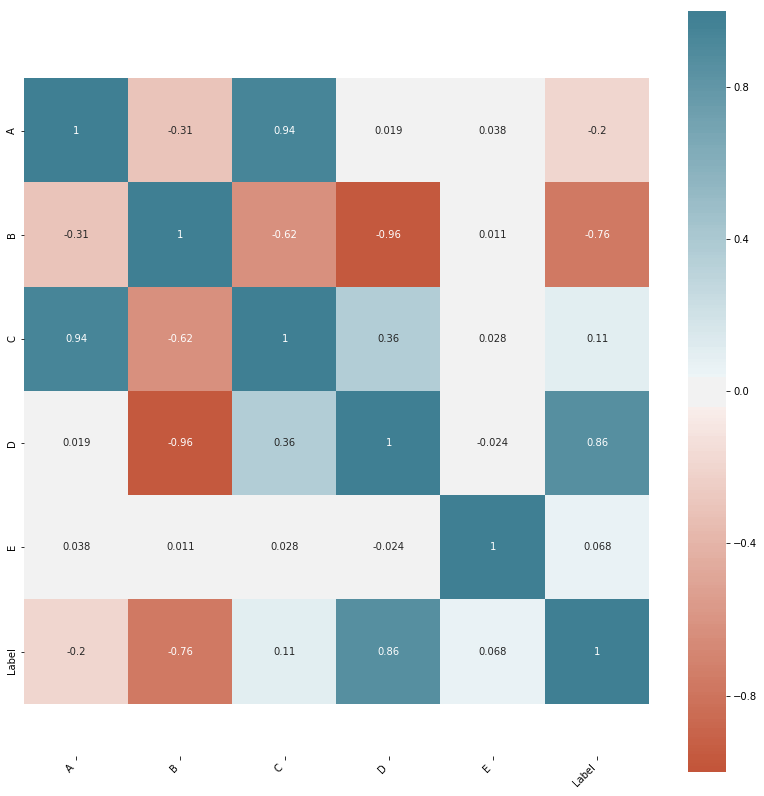

In [20]:
# Correlation of the features
import seaborn as sns
import matplotlib.pyplot as plt
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [22]:
# Drop correlated features 
# Dropping negative colerated features 
new_df = df.drop([ "B"],axis=1)

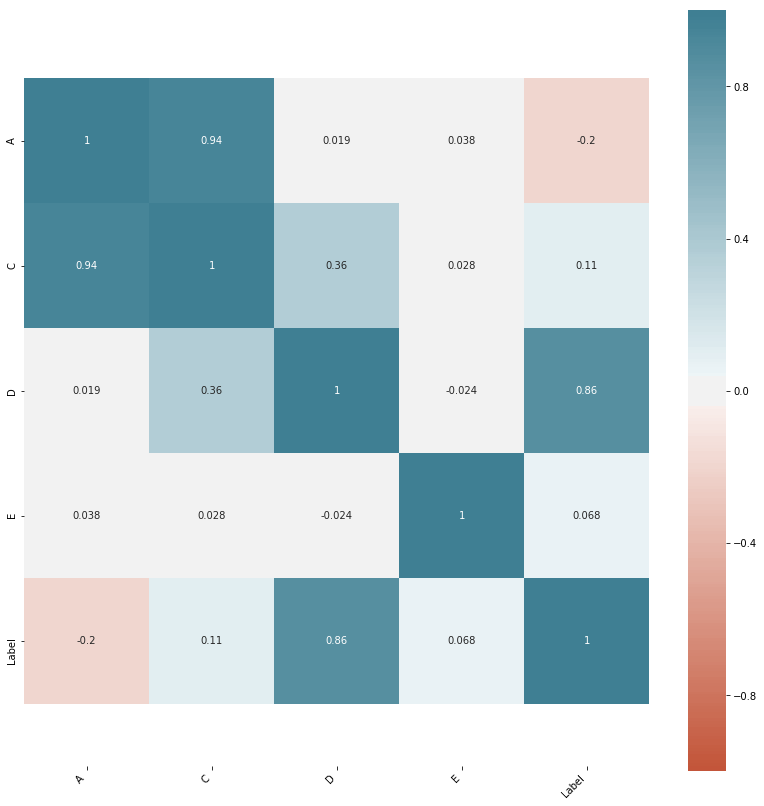

In [23]:
#checking correlation matrix
corr = new_df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

In [24]:
# Handle outliers (you can use IsolationForest, Z-score, IQR)
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(new_df))
z

array([[4.48580011e-01, 5.51841148e-01, 3.88604330e-01, 6.79321778e-01,
        1.00000000e+00],
       [2.72713460e-01, 4.76847650e-01, 6.47953399e-01, 6.51310079e-01,
        1.00000000e+00],
       [1.26207574e+00, 9.38710767e-01, 6.94619844e-01, 1.00850734e+00,
        1.00000000e+00],
       [1.74183395e+00, 1.67236016e+00, 1.38801357e-01, 4.13618391e-01,
        1.00000000e+00],
       [4.74670592e-01, 2.39854757e-01, 1.98809177e+00, 5.12322158e-01,
        1.00000000e+00],
       [1.60853711e+00, 1.42690271e+00, 2.13973442e-01, 1.27419853e+00,
        1.00000000e+00],
       [1.03389951e+00, 6.36497125e-01, 9.54943166e-01, 1.01305245e-01,
        1.00000000e+00],
       [1.21512624e+00, 1.53275075e+00, 1.16306906e+00, 1.56896929e-01,
        1.00000000e+00],
       [7.44470283e-01, 8.79016326e-01, 5.37672834e-01, 5.16749922e-01,
        1.00000000e+00],
       [9.59931402e-01, 5.46150576e-01, 1.01713233e+00, 4.13698223e-01,
        1.00000000e+00],
       [6.68082554e-01, 9.8364

In [25]:
len(np.where(z > 3)[0])

1

In [27]:
outliers = list(set(np.where(z > 3)[0]))
new_df2 = new_df.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df2)

,index,A,C,D,E,Label
0,0,-0.430668,-0.724280,-0.539630,-0.651600,0
1,1,0.211646,0.534794,0.825848,0.681953,1
2,2,1.092675,1.100096,-0.942751,-0.981509,0
3,3,1.519901,1.998053,0.155132,-0.385314,0
4,4,-0.453901,0.244724,2.591239,-0.484234,1
5,5,-1.463612,-1.795320,0.254157,-1.247783,1
6,6,0.889484,0.730198,-1.285680,0.130741,0
7,7,-1.113279,-1.924874,-1.559849,0.186454,0
8,8,0.631746,1.027032,0.680573,0.547097,1
9,9,-0.886027,-0.717315,1.312175,0.443819,1


In [29]:
X=new_df2.iloc[:,1:5]
X

,A,C,D,E
0,-0.430668,-0.724280,-0.539630,-0.651600
1,0.211646,0.534794,0.825848,0.681953
2,1.092675,1.100096,-0.942751,-0.981509
3,1.519901,1.998053,0.155132,-0.385314
4,-0.453901,0.244724,2.591239,-0.484234
5,-1.463612,-1.795320,0.254157,-1.247783
6,0.889484,0.730198,-1.285680,0.130741
7,-1.113279,-1.924874,-1.559849,0.186454
8,0.631746,1.027032,0.680573,0.547097
9,-0.886027,-0.717315,1.312175,0.443819


In [30]:
y=new_df2.iloc[:,5:6]
y

,Label
0,0
1,1
2,0
3,0
4,1
5,1
6,0
7,0
8,1
9,1


In [31]:
# Split dataset into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [32]:
# Import Decision Tree, define different hyperparamters and tune the algorithm.
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 1.0
Accuracy of test: 0.9666666666666667


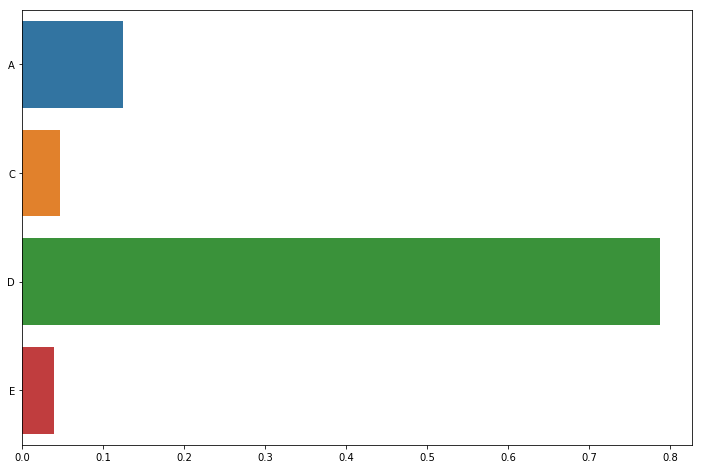

In [33]:
# Visualize feature importances.
#Feature Importance
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [37]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
# Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
cm

array([[ 9,  1],
       [ 0, 20]])

For 30 test data 29 true, 1 false

In [ ]:
# Classification Report
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

In [35]:
# Metrics
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.9761904761904762
Recall = 0.95
Accuracy = 0.9666666666666667
F1 Score = 0.9614890885750963


In [58]:
# Import XGBoostClassifier, define different hyperparamters and tune the algorithm.
## Hyperparameter Tuning

from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  

param_dict = {
    'max_depth':range(3,10,2),
    'min_child_weight':range(1,6,2),
    'learning_rate': [0.00001,0.001,0.01,0.1,1,2],
    'n_estimators': [10,190,200,210,500,1000,2000]
    
}

xgc = XGBClassifier(booster='gbtree', learning_rate =0.01, n_estimators=200, max_depth=5, min_child_weight=1, 
                      gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, 
                      scale_pos_weight=1, seed=27)

clf2 = GridSearchCV(xgc,param_dict,cv=3, n_jobs = -1).fit(X_train,y_train)

print("Tuned: {}".format(clf2.best_params_)) 
print("Mean of the cv scores is {:.6f}".format(clf2.best_score_))
print("Train Score {:.6f}".format(clf2.score(X_train,y_train)))
print("Test Score {:.6f}".format(clf2.score(X_test,y_test)))
print("Seconds used for refitting the best model on the train dataset: {:.6f}".format(clf2.refit_time_))

/home/ebru/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/ebru/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/ebru/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[22:04:59] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Tuned: {'learning_rate': 1, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 190}
Mean of the cv scores is 0.956522
Train Score 1.000000
Test Score 1.000000
Seconds used for refitting the best model on the train dataset: 0.285002


In [59]:
pred2 = clf2.predict(X_test)
print(classification_report(y_test,pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



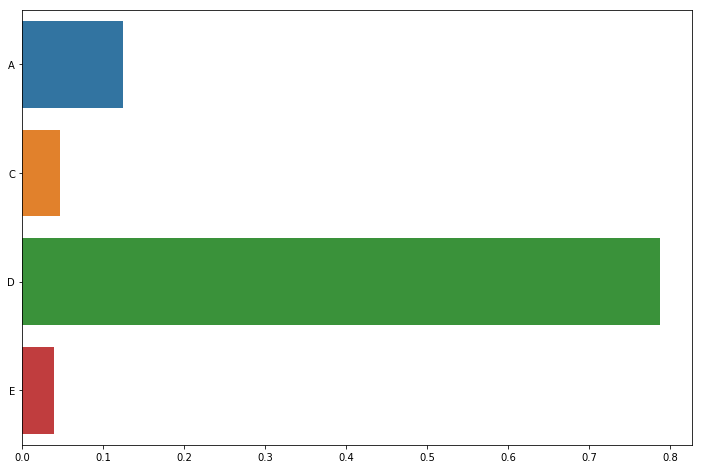

In [64]:
# Visualize feature importances.
plt.figure(figsize=(12, 8))
importance2 = model.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [52]:
# Create confusion matrix and calculate accuracy, recall, precision and f1 score.
cm2 = confusion_matrix(y_test, pred)
cm2

array([[ 9,  1],
       [ 0, 20]])

For 30 test data 29 true, 1 false

In [53]:
print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, best_preds)))

Precision = 1.0
Recall = 1.0
Accuracy = 1.0


In [54]:
# Evaluate your result and select best performing algorithm for our case.

Decision tree gives % 96 accuracy score and xgboost ensemble gives % 100 accuracy score. Both of them works good but Xgboost perform better.